<a href="https://colab.research.google.com/github/jaeyeon1234/hondl/blob/main/hondeeplearning03_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tf_keras as keras
from tf_keras import layers
import tensorflow_hub as hub

In [6]:
hub_efficientb0 = keras.Sequential([
    layers.Input(shape=(224,224,3)),
    layers.Rescaling(1.0/255.0),
    hub.KerasLayer('https://www.kaggle.com/models/tensorflow/efficientnet/TensorFlow2/b0-classification/1')
])

In [7]:
!gdown 1xGkTT3uwYt4myj6eJJeYtdEFgTi2Sj8C
!unzip cat-dog-images.zip

import numpy as np
from PIL import Image
dog_png=np.array(Image.open('images/dog.png'))

Downloading...
From: https://drive.google.com/uc?id=1xGkTT3uwYt4myj6eJJeYtdEFgTi2Sj8C
To: /content/cat-dog-images.zip
100% 182k/182k [00:00<00:00, 40.6MB/s]
Archive:  cat-dog-images.zip
   creating: images/
  inflating: images/dog.png          
  inflating: images/cat.png          


In [8]:
from keras.applications import efficientnet

predictions=hub_efficientb0.predict(dog_png[np.newaxis,:])
efficientnet.decode_predictions(predictions)

1/1 [==============================] - 4s 4s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


[[('n02099712', 'Labrador_retriever', np.float32(0.3682943)),
  ('n02104029', 'kuvasz', np.float32(0.19339891)),
  ('n02099601', 'golden_retriever', np.float32(0.06145812)),
  ('n02111500', 'Great_Pyrenees', np.float32(0.05779673)),
  ('n02095889', 'Sealyham_terrier', np.float32(0.017902806))]]

In [9]:
from transformers import pipeline

In [10]:
pipe= pipeline(task='image-classification', device=0,
               model = 'google/efficientnet-b0')

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/21.4M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/21.4M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cpu


In [11]:
pipe('images/dog.png')

[{'label': 'Labrador retriever', 'score': 0.3682946264743805},
 {'label': 'kuvasz', 'score': 0.19339881837368011},
 {'label': 'golden retriever', 'score': 0.061458297073841095},
 {'label': 'Great Pyrenees', 'score': 0.05779697746038437},
 {'label': 'Sealyham terrier, Sealyham', 'score': 0.01790272817015648}]

In [13]:
!gdown 10bnEC6-ZfXZFZ2mb3zoWd38TjYufanWo
!unzip -q Pistachio_Image_Dataset.zip

Downloading...
From: https://drive.google.com/uc?id=10bnEC6-ZfXZFZ2mb3zoWd38TjYufanWo
To: /content/Pistachio_Image_Dataset.zip
100% 25.9M/25.9M [00:00<00:00, 34.8MB/s]


In [15]:
pistachio_sample=np.array(Image.open
                          ('Pistachio_Image_Dataset/Kirmizi_Pistachio/kirmizi (1).jpg'))
pistachio_sample.shape


(600, 600, 3)

In [16]:
efficientb7 = keras.applications.EfficientNetB7()
predictions = efficientb7.predict(pistachio_sample[np.newaxis,:])
efficientnet.decode_predictions(predictions)

1/1 [==============================] - 31s 31s/step


[[('n01950731', 'sea_slug', np.float32(0.23482268)),
  ('n01924916', 'flatworm', np.float32(0.20674507)),
  ('n01943899', 'conch', np.float32(0.086223796)),
  ('n01945685', 'slug', np.float32(0.0850055)),
  ('n01955084', 'chiton', np.float32(0.028243236))]]

In [17]:
keras_efficientb0_base = keras.applications.EfficientNetB0(
    include_top=False
)
feature_map = keras_efficientb0_base.predict(pistachio_sample[np.newaxis,:])
feature_map.shape

1/1 [==============================] - 6s 6s/step


(1, 18, 18, 1280)

In [18]:
train_ds, val_ds = keras.utils.image_dataset_from_directory(
    'Pistachio_Image_Dataset', image_size=(224,224), batch_size=16,
    validation_split=0.2, subset='both', seed=42
)

Found 2148 files belonging to 2 classes.
Using 1719 files for training.
Using 429 files for validation.


In [19]:
keras_efficientb0_base.trainable = False

In [20]:
inputs = keras.Input(shape=(224,224,3))
x = keras_efficientb0_base(inputs)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs, outputs)

In [25]:
rmsprop = keras.optimizers.RMSprop(learning_rate=5e-5)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
hist=model.fit(train_ds, epochs=20, validation_data=val_ds)

Epoch 1/20
108/108 [==============================] - 195s 2s/step - loss: 0.0846 - accuracy: 0.9732 - val_loss: 0.0897 - val_accuracy: 0.9697
Epoch 2/20
108/108 [==============================] - 150s 1s/step - loss: 0.0815 - accuracy: 0.9756 - val_loss: 0.0840 - val_accuracy: 0.9767
Epoch 3/20
108/108 [==============================] - 138s 1s/step - loss: 0.0727 - accuracy: 0.9796 - val_loss: 0.0812 - val_accuracy: 0.9744
Epoch 4/20
108/108 [==============================] - 140s 1s/step - loss: 0.0703 - accuracy: 0.9785 - val_loss: 0.0784 - val_accuracy: 0.9767
Epoch 5/20
108/108 [==============================] - 187s 2s/step - loss: 0.0618 - accuracy: 0.9837 - val_loss: 0.0757 - val_accuracy: 0.9744
Epoch 6/20
108/108 [==============================] - 152s 1s/step - loss: 0.0654 - accuracy: 0.9808 - val_loss: 0.0728 - val_accuracy: 0.9767
Epoch 7/20
108/108 [==============================] - 144s 1s/step - loss: 0.0618 - accuracy: 0.9779 - val_loss: 0.0712 - val_accuracy: 0.9744

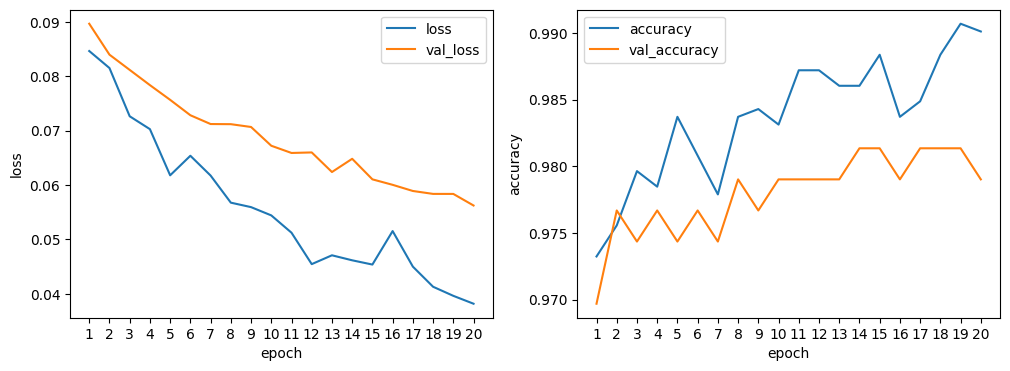

In [27]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(range(1,21), hist.history['loss'], label='loss')
axs[0].plot(range(1,21), hist.history['val_loss'], label='val_loss')
axs[0].set_xticks(range(1,21))
axs[0].set_xlabel('epoch')
axs[0].set_ylabel('loss')
axs[0].legend()
axs[1].plot(range(1,21), hist.history['accuracy'], label='accuracy')
axs[1].plot(range(1,21), hist.history['val_accuracy'], label='val_accuracy')
axs[1].set_xticks(range(1,21))
axs[1].set_xlabel('epoch')
axs[1].set_ylabel('accuracy')
axs[1].legend()
plt.show()